In [6]:
from textblob import TextBlob
import numpy as np
import nltk
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
from textblob.taggers import NLTKTagger
from wordcloud import WordCloud, STOPWORDS

In [7]:
#nltk.download('inaugural')
data=inaugural.fileids()[-6:]

nltktagger = NLTKTagger()
Trump = TextBlob(inaugural.raw(fileids = data[-1]),pos_tagger = nltktagger).pos_tags
Obama_2 = TextBlob(inaugural.raw(fileids = data[-2]),pos_tagger = nltktagger).pos_tags
Obama_1 = TextBlob(inaugural.raw(fileids = data[-3]),pos_tagger = nltktagger).pos_tags
Bush_2 = TextBlob(inaugural.raw(fileids = data[-4]),pos_tagger = nltktagger).pos_tags

Bush_1 = TextBlob(inaugural.raw(fileids = data[-5]),pos_tagger = nltktagger).pos_tags
BillClinton=TextBlob(inaugural.raw(fileids = data[-6]),pos_tagger = nltktagger).pos_tags

In [9]:
tags = [Trump,Obama_2,Obama_1,Bush_2,Bush_1,BillClinton]
presidents = ["Trump Speech ","Obama 2nd Term ","Obama 1st Term ","Bush 2nd Term ","Bush 1st Term ", "BillClinton"]


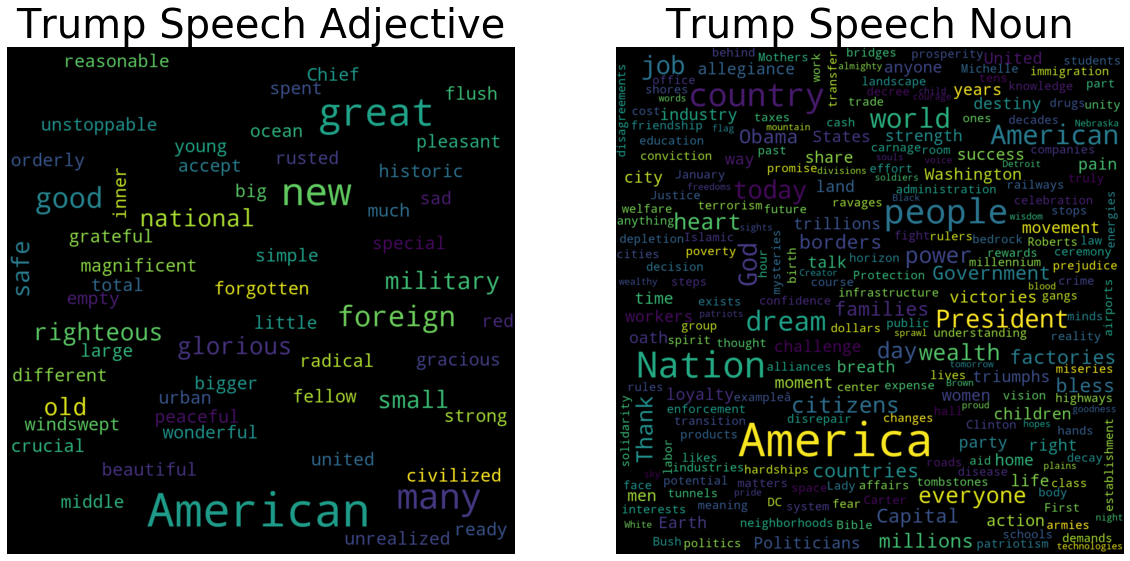

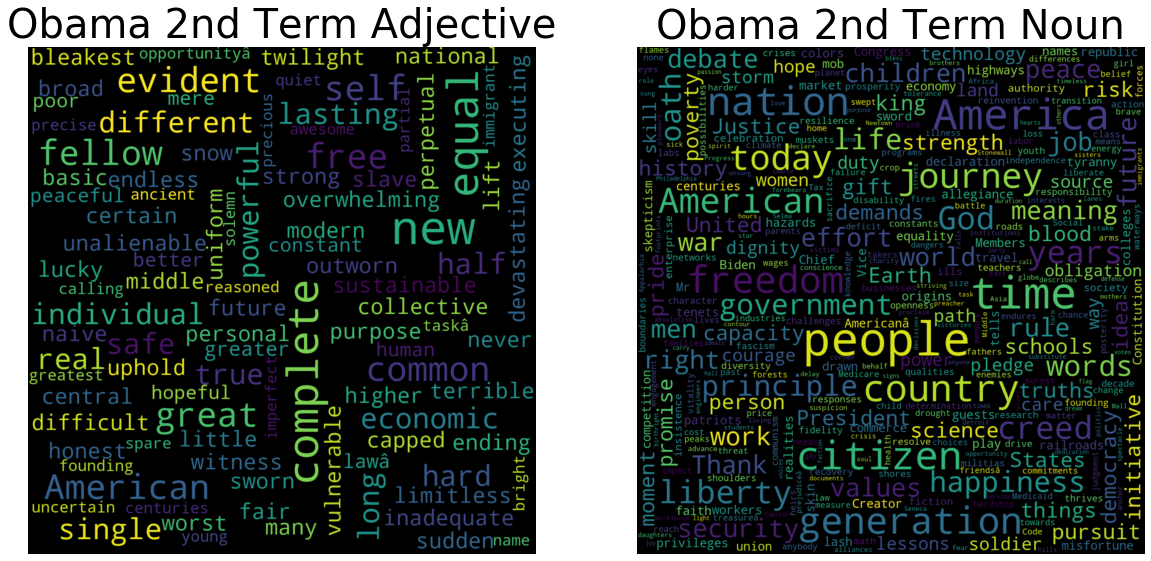

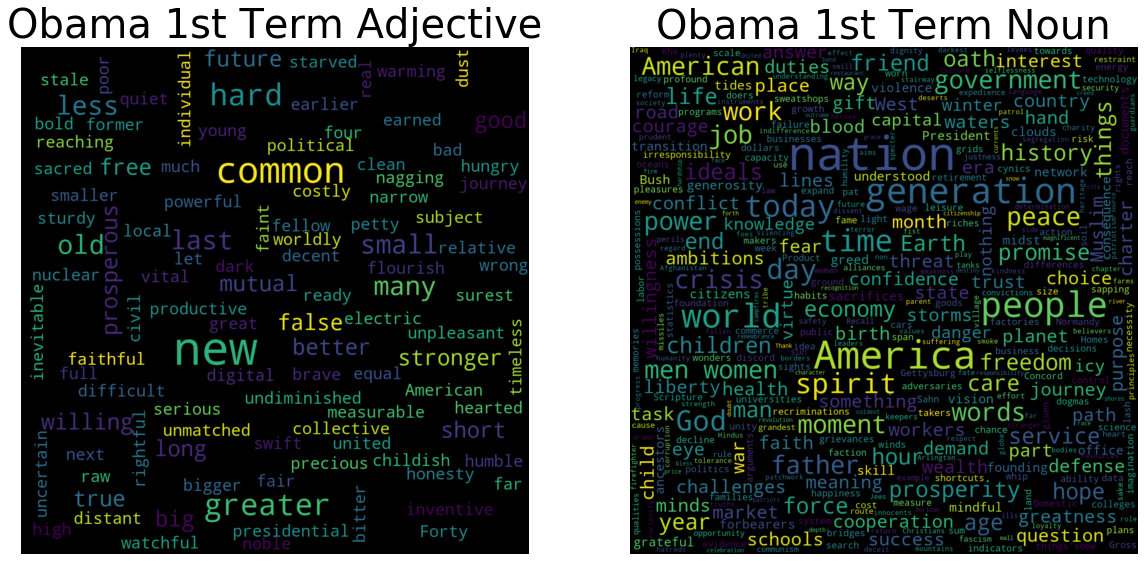

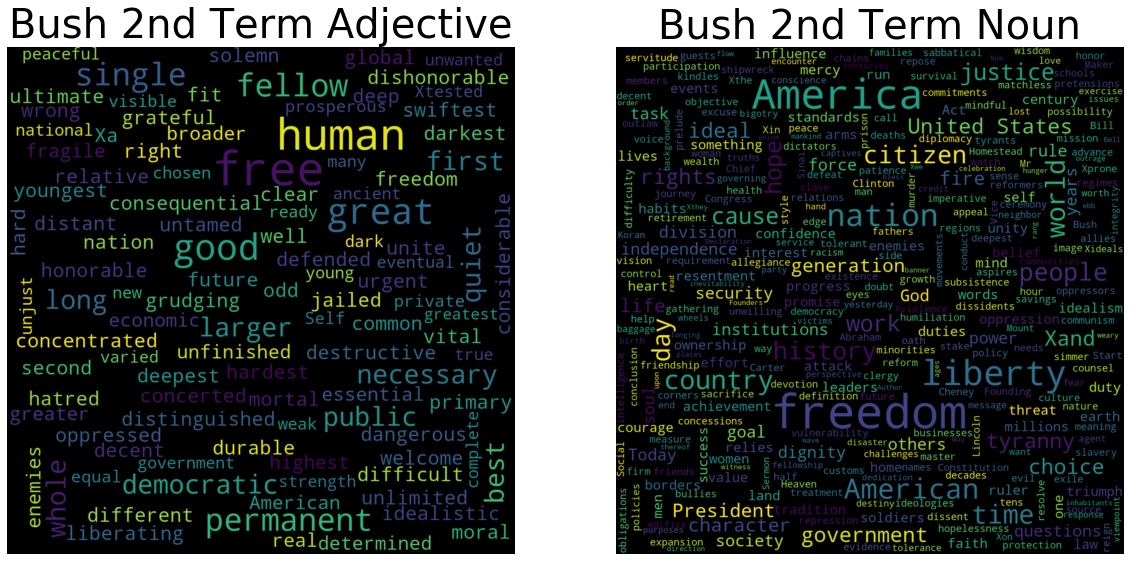

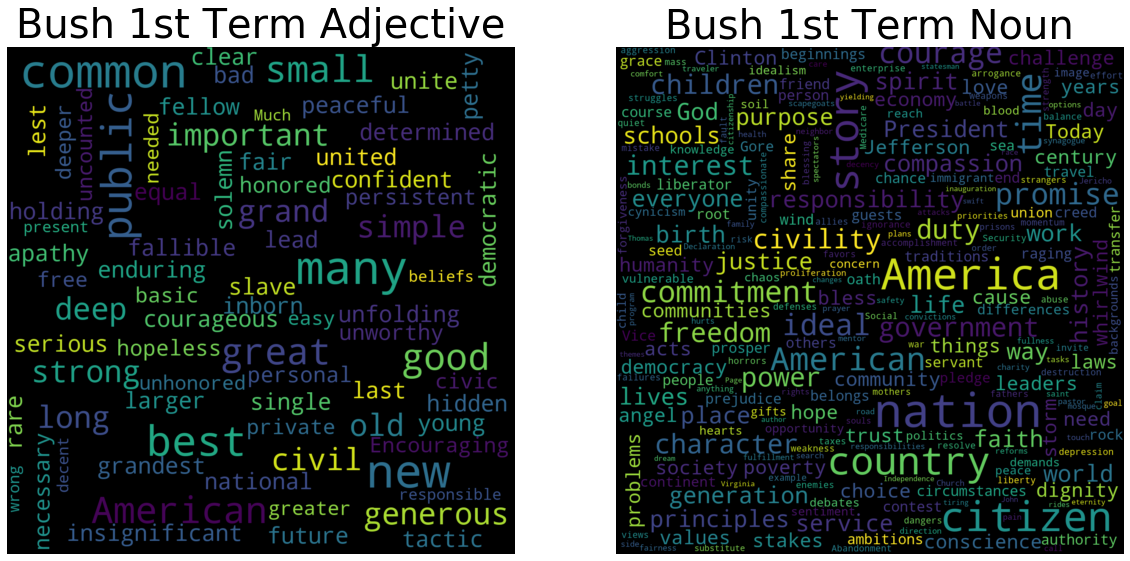

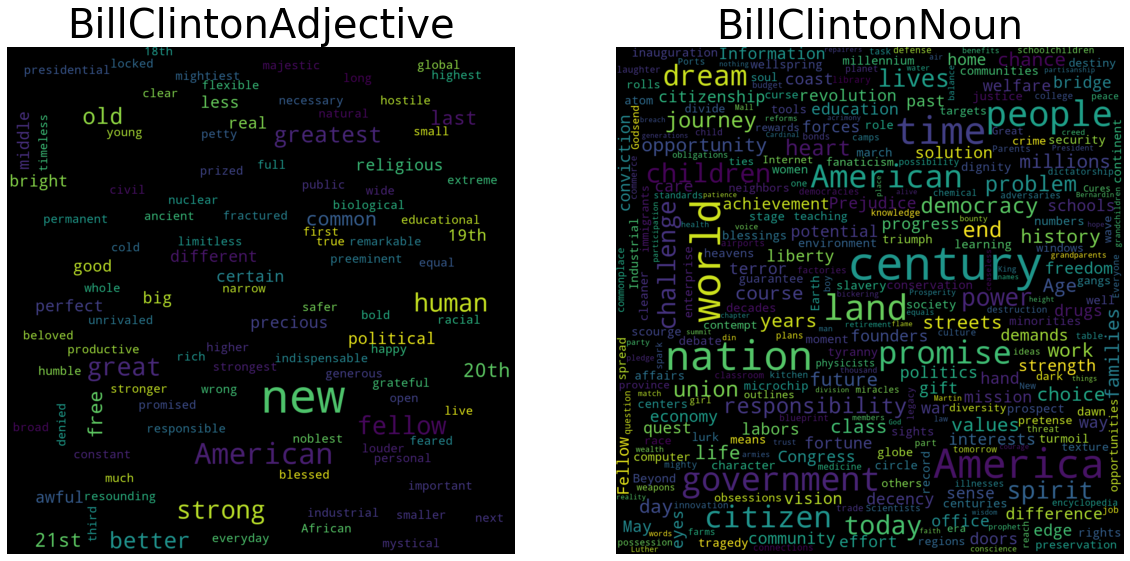

In [10]:
for j in range(6):
    i = 1
    adjectives = []
    nouns = []
    for tag_tuple in tags[j]:
        if(tag_tuple[1] in ['JJ','JJR','JJS']):
            adjectives.append(tag_tuple[0])
        elif(tag_tuple[1] in ['NN','NNS','NNP','NNPS']):
            nouns.append(tag_tuple[0])
    adjectives = " ".join(adjectives)
    nouns = " ".join(nouns)

    wordcloud_adjective = WordCloud(stopwords = set(STOPWORDS),width = 1200, height = 1200,background_color="black", max_words = 500,max_font_size = 110).generate(adjectives)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(1,2,i)
    ax.imshow(wordcloud_adjective, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(presidents[j] + "Adjective",fontsize = 40)
    i += 1
    wordcloud_noun = WordCloud(stopwords = set(STOPWORDS),width = 1200, height = 1200,background_color="black", max_words = 500,max_font_size = 110).generate(nouns)
    ax = fig.add_subplot(1,2,i)
    ax.imshow(wordcloud_noun, interpolation="bilinear")
    ax.set_title(presidents[j] + "Noun",fontsize = 40)
    ax.axis("off")
    
    plt.show()